In [107]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

In [108]:
X_train, y_train = [],[]
rows = open("/path/to/folder/Train.csv").read().strip().split("\n")[1:]
random.shuffle(rows)
print(len(rows))
# full_img_path = "D:/Deep Learning/Personal/fruits-360-original-size/Training/apple_crimson_snow_1/r0_12.jpg"
# img = cv2.imread(full_img_path, cv2.IMREAD_UNCHANGED)
# print(img.shape)
count = 0
for row in rows:
    
    img_path, label  = row.strip().split(",")[-2:]
    full_img_path = "/path/to/folder/" + img_path  # Ensure the path is correct
    img = cv2.imread(full_img_path, cv2.IMREAD_UNCHANGED)


    if img is not None:
        count+=1
        # Resize the image
        img_resized = cv2.resize(img, (32,32))
        # If the image is grayscale, convert it to RGB
        if img_resized.ndim == 2:
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
        
        X_train.append(img_resized)
        y_train.append(int(label))

print(y_train)
X_train, y_train = np.array(X_train), np.array(y_train)
print(y_train)

print(count)
print(X_train.shape, y_train.shape)

6230
[22, 0, 0, 6, 6, 14, 4, 11, 1, 10, 10, 1, 9, 4, 13, 2, 12, 14, 13, 8, 7, 5, 0, 2, 3, 0, 7, 4, 2, 23, 22, 12, 11, 7, 7, 11, 1, 8, 10, 5, 20, 7, 17, 4, 12, 6, 2, 10, 11, 20, 4, 6, 6, 19, 8, 16, 10, 4, 1, 11, 14, 3, 14, 0, 7, 22, 13, 8, 21, 3, 4, 0, 17, 8, 4, 1, 11, 11, 9, 10, 9, 7, 9, 22, 23, 16, 11, 7, 14, 0, 18, 20, 13, 7, 9, 6, 7, 14, 9, 19, 2, 20, 15, 0, 0, 1, 6, 7, 10, 17, 13, 19, 0, 1, 11, 9, 17, 7, 11, 10, 14, 6, 23, 17, 12, 1, 4, 7, 8, 11, 8, 10, 14, 18, 10, 4, 13, 8, 13, 11, 11, 11, 15, 9, 2, 3, 7, 12, 12, 11, 2, 9, 14, 20, 8, 13, 3, 0, 8, 14, 5, 7, 8, 10, 7, 16, 0, 8, 21, 1, 9, 12, 5, 4, 10, 7, 4, 4, 0, 21, 20, 8, 3, 14, 10, 11, 12, 3, 7, 23, 11, 12, 0, 8, 9, 2, 7, 0, 4, 6, 7, 16, 5, 23, 8, 3, 6, 6, 20, 10, 2, 1, 19, 7, 21, 1, 3, 12, 0, 9, 7, 6, 2, 0, 20, 11, 16, 4, 10, 22, 10, 17, 6, 0, 5, 7, 7, 13, 3, 6, 7, 2, 10, 10, 13, 6, 5, 21, 19, 14, 8, 3, 10, 20, 10, 21, 4, 16, 18, 21, 5, 18, 8, 8, 0, 2, 15, 12, 11, 11, 20, 16, 18, 13, 0, 11, 0, 2, 19, 3, 22, 3, 9, 2, 10, 0, 21, 3

In [109]:
X_test, y_test = [],[]
rows = open("/path/to/folder/Test.csv").read().strip().split("\n")[1:]
random.shuffle(rows)
print(len(rows))
count = 0
for row in rows:
    img_path, label = row.strip().split(",")[-2:]
    full_img_path = "/path/to/folder/" + img_path  # Ensure the path is correct
    img = cv2.imread(full_img_path, cv2.IMREAD_UNCHANGED)

    
    if img is not None:
        count+=1
        # Resize the image
        img_resized = cv2.resize(img, (32,32))
        
        # If the image is grayscale, convert it to RGB
        if img_resized.ndim == 2:
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
        
        X_test.append(img_resized)
        y_test.append(int(label))
        # print(label)

print(count)
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

3109
3109
(3109, 32, 32, 3) (3109,)


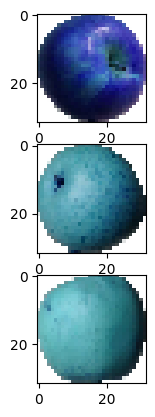

Labels:  2 20 5


In [110]:
idx = [15,2500,5000]
fig,axes = plt.subplots(3)
axes[0].imshow(X_train[idx[0]])
axes[1].imshow(X_train[idx[1]])
axes[2].imshow(X_train[idx[2]])
plt.show()

print('Labels: ',y_train[idx[0]],y_train[idx[1]],y_train[idx[2]])

In [111]:
labels_list = ['apple_6','apple_braeburn_1','apple_crimson_snow_1','apple_golden_1',
                'apple_golden_2','apple_golden_3','apple_granny_smith_1','apple_hit_1',
                'apple_pick_lady_1','apple_red_1','apple_red_2','apple_red_3','apple_red_delicios_1',
                'apple_red_yellow_1','apple_rotten_1','cabbage_white_1','carrot_1','cucumber_1',
                'cucumber_3','eggplant_violet_1','pear_1','pear_2','Zucchini_1','Zucchini_dark_1']

In [112]:
def resize_imgs(X):
    X_out = []
    for img in X:
        img = cv2.resize(img,(32,32))
        X_out.append(img)
    X_out = np.array(X_out)
    return X_out

In [113]:
n_labels = len(np.unique(y_train)) 
y_train = to_categorical(y_train, n_labels)
y_test = to_categorical(y_test, n_labels)


X_train = resize_imgs(X_train)
X_test = resize_imgs(X_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [114]:
print(y_train[0].shape)

(24,)


In [115]:
def build_model(n_labels):

    # initialize model
    model = Sequential()

    # feature detector
    model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(n_labels, activation='softmax'))

    # compiler
    model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

    return model

In [116]:
def train_model(model,X_train,y_train,X_test,y_test,n_epochs,batch_size):

    h = model.fit(X_train,y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test,y_test))#, verbose=0)

    return h

In [117]:
def calc_accuracy(model,X,y):

    _, accuracy = model.evaluate(X,y)
    print('Accuracy value: %f ' % (accuracy*100) )

In [123]:
def predict_imgs(path, model_name, X_test, labels_list):
    # Load model
    model = load_model(path + model_name)

    # Ensure the input image is in the correct format
    img = cv2.resize(X_test[500], (32, 32))
    img_to_pred = np.expand_dims(img, axis=0)  

    # Plot image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    plt.show()

    # Predict
    predictions = model.predict(img_to_pred)
    y_pred = np.argmax(predictions, axis=1) 
    label_pred = labels_list[y_pred[0]]

    return label_pred

In [119]:
def plot_history(h):

    fig = plt.subplots(1)
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.plot(h.history['val_accuracy'], label='test accuracy')
    plt.title('Classifier CNN evaluation')
    plt.legend()
    plt.show()

Epoch 1/10
195/195 [==============================] - 6s 26ms/step - loss: 1.5892 - accuracy: 0.4819 - val_loss: 0.2287 - val_accuracy: 0.9267
Epoch 2/10
195/195 [==============================] - 5s 25ms/step - loss: 0.3685 - accuracy: 0.8647 - val_loss: 0.0636 - val_accuracy: 0.9865
Epoch 3/10
195/195 [==============================] - 5s 24ms/step - loss: 0.1808 - accuracy: 0.9371 - val_loss: 0.0391 - val_accuracy: 0.9846
Epoch 4/10
195/195 [==============================] - 5s 24ms/step - loss: 0.1449 - accuracy: 0.9496 - val_loss: 0.0189 - val_accuracy: 0.9968
Epoch 5/10
195/195 [==============================] - 5s 24ms/step - loss: 0.1358 - accuracy: 0.9520 - val_loss: 0.1264 - val_accuracy: 0.9469
Epoch 6/10
195/195 [==============================] - 8s 39ms/step - loss: 0.0576 - accuracy: 0.9793 - val_loss: 0.0075 - val_accuracy: 0.9990
Epoch 7/10
195/195 [==============================] - 6s 28ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0224 - val_accuracy: 0.9936

c:\miniconda\envs\newenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


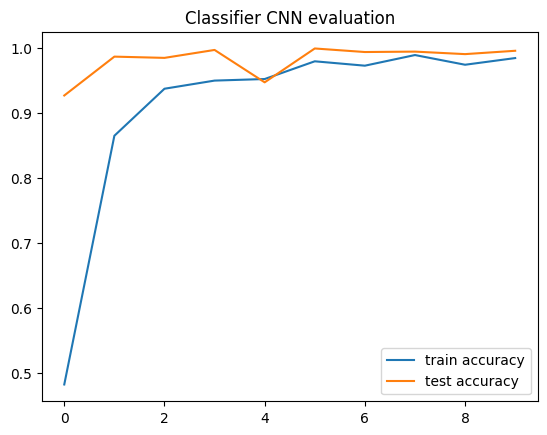

In [121]:
model = build_model(len(labels_list))

n_epochs = 10
batch_size = 32
h = train_model(model,X_train,y_train,X_test,y_test,n_epochs,batch_size)

calc_accuracy(model,X_test,y_test)

model.save('fruits.h5')
plot_history(h)

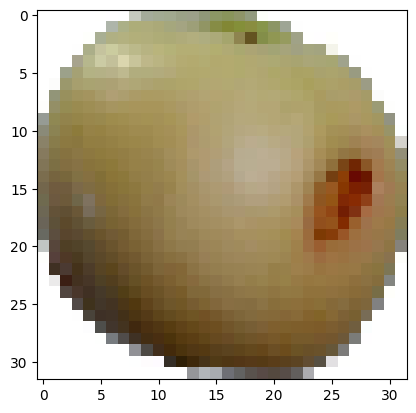

1/1 [==============================] - 0s 62ms/step
apple_6


In [124]:
model_name = "fruits.h5"
path = "D:/Deep Learning/Personal/"
print(predict_imgs(path,model_name,X_test, labels_list))